In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [3]:
# Set random seeds for reproducibility
torch.manual_seed(42)

In [4]:
df_train = pd.read_csv('emnist-digits-train.csv')
df_test = pd.read_csv('emnist-digits-test.csv')

df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

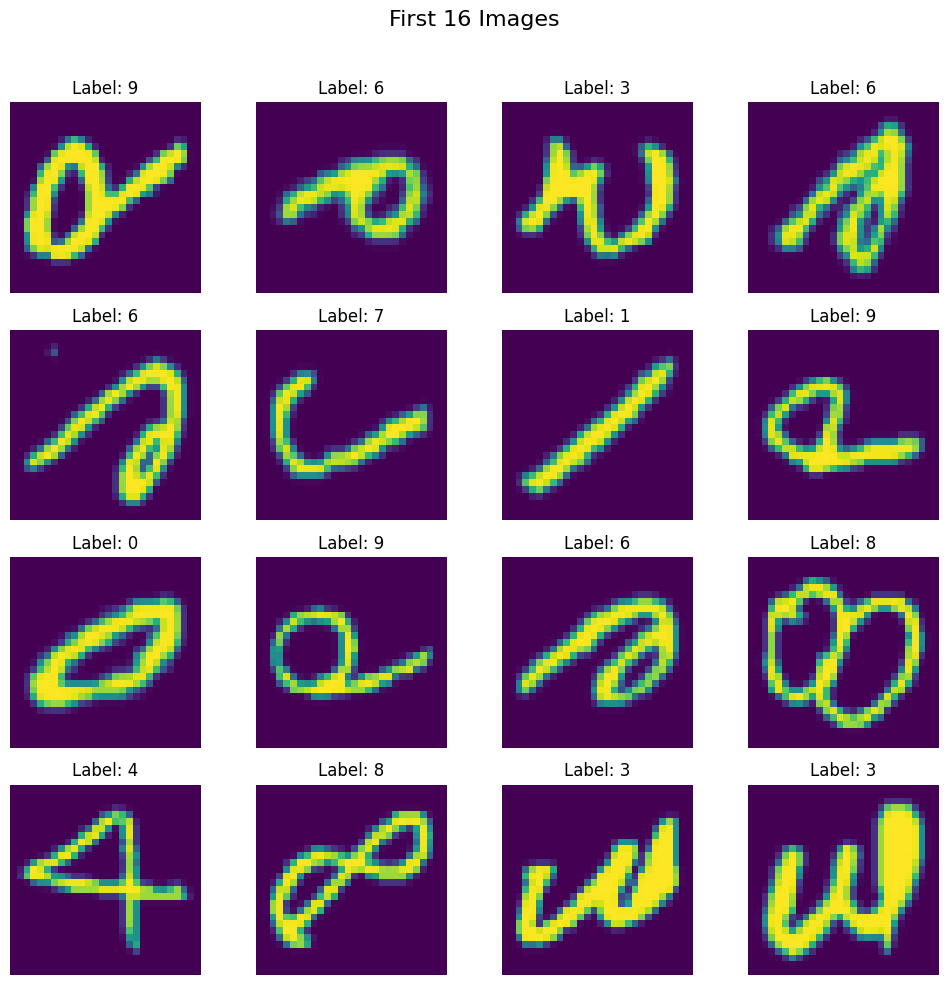

In [5]:
# Create a 4x4 grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
fig.suptitle("First 16 Images", fontsize=16)

# Plot the first 16 images from the dataset
for i, ax in enumerate(axes.flat):
    img = df_train.iloc[i, 1:].values.reshape(28, 28)  # Reshape to 28x28
    ax.imshow(img)  # Display in grayscale
    ax.axis('off')  # Remove axis for a cleaner look
    ax.set_title(f"Label: {df_train.iloc[i, 0]}")  # Show the label

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

In [6]:
x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]
x_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]

In [8]:
# scaling the feautures
x_train = x_train/255.0
x_test = x_test/255.0

In [9]:
x_train

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.511,0.512,0.513,0.514,0.515,0.516,0.517,0.518,0.519,0.520
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
239997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
x_train = torch.tensor(x_train.values, dtype=torch.float32)
y_train = torch.tensor(y_train.values, dtype=torch.float32)
x_test = torch.tensor(x_test.values, dtype=torch.float32)
y_test = torch.tensor(y_test.values, dtype=torch.float32)

In [11]:
# create CustomDataset Class
class CustomDataset(Dataset):
    def __init__(self, features, labels):
        self.features = torch.tensor(features, dtype=torch.float32)
        self.labels = torch.tensor(labels, dtype=torch.long)
    def __len__(self):
        return len(self.features)
    def __getitem__(self, idx):
        feature = self.features[idx]
        label = self.labels[idx]
        return feature, label

In [12]:
## create train dataset oject
train_dataset = CustomDataset(x_train, y_train)

/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_16173/3652203783.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_16173/3652203783.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)


In [13]:
len(train_dataset)

239999

In [14]:
## create test dataset object
test_dataset = CustomDataset(x_test, y_test)

/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_16173/3652203783.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.features = torch.tensor(features, dtype=torch.float32)
/var/folders/y3/wvn_6p0s6f933qxhdk0tbp3c0000gn/T/ipykernel_16173/3652203783.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  self.labels = torch.tensor(labels, dtype=torch.long)


In [15]:
len(test_dataset)

39999

In [16]:
## Create train and test loader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=32, shuffle=False)## we dont need shuffling while prediction


In [17]:
from model_def import NeuralNetwork

In [18]:
## set learning rate and epochs
lr = 0.001
epochs = 100

In [ ]:
# instatiate the model
model = NeuralNetwork(x_train.shape[1])

# loss function
criterion = nn.CrossEntropyLoss()

# Optimizer
optimizer = optim.AdamW(model.parameters(), lr = lr)

In [19]:
model = NeuralNetwork(x_train.shape[1])
criterion = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
# Learning Rate Scheduler
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.5)
for epoch in range(epochs):
    model.train()
    total_epoch_loss = 0
    for batch_features, batch_labels in train_loader:
        # forward pass
        outputs = model(batch_features)

        #calculate loss
        loss = criterion(outputs, batch_labels)

        # back propagation
        optimizer.zero_grad()
        loss.backward()
        # update gradients
        optimizer.step()
        total_epoch_loss += loss.item()

    scheduler.step()  # Step the LR scheduler after each epoch
    avg_epoch_loss = total_epoch_loss/len(train_loader)
    print(f'Epoch {epoch+1}, Loss: {avg_epoch_loss}')

Epoch 1, Loss: 0.11620184105611019
Epoch 2, Loss: 0.06325259501800756
Epoch 3, Loss: 0.0522089963026825
Epoch 4, Loss: 0.046620740553894334
Epoch 5, Loss: 0.04395423996008618
Epoch 6, Loss: 0.02621675936575254
Epoch 7, Loss: 0.022296579729189914
Epoch 8, Loss: 0.020787372323679422
Epoch 9, Loss: 0.019917096414028886
Epoch 10, Loss: 0.018232462627608616
Epoch 11, Loss: 0.011391528405938645
Epoch 12, Loss: 0.009861960561186133
Epoch 13, Loss: 0.008668756814826662
Epoch 14, Loss: 0.00858378093687488
Epoch 15, Loss: 0.007892637526509335
Epoch 16, Loss: 0.0052528782847001635
Epoch 17, Loss: 0.004883494916227946
Epoch 18, Loss: 0.004648966522640273
Epoch 19, Loss: 0.004070923649977575
Epoch 20, Loss: 0.0042905379084804745
Epoch 21, Loss: 0.0034354336045390307
Epoch 22, Loss: 0.00295662280322611
Epoch 23, Loss: 0.0028177811031869474
Epoch 24, Loss: 0.002623476536009615
Epoch 25, Loss: 0.0023642724672674593
Epoch 26, Loss: 0.0021741836285349885
Epoch 27, Loss: 0.0018464566714995756
Epoch 28, L

In [20]:
## set model to eval mode
model.eval()

NeuralNetwork(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=10, bias=True)
  )
)

In [21]:
## evaluation code
total = 0
correct = 0

with torch.no_grad():

    for batch_features, batch_labels in test_loader:

        outputs = model(batch_features) # for every batch of test data, model will give one tensor of (32 * 10)

        _, predicted = torch.max(outputs, 1)

        total += batch_labels.shape[0]

        correct += (predicted == batch_labels).sum().item()

accuracy = correct / total
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.99


In [22]:
import pickle

# Assuming your trained model variable is `model`
with open('fashion_mnist_model.pkl', 'wb') as f:
    pickle.dump(model, f)

# After final training and evaluation
torch.save(model.state_dict(), 'fashion_mnist_model.pth')
print("Model saved successfully!")


Model saved successfully!


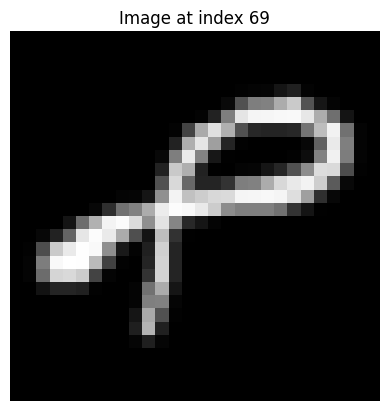

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007843137718737125, 0.01568627543747425, 0.019607843831181526, 0.08235294371843338, 0.125490203499794, 0.0117647061124444, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.03529411926865578, 0.32156863808631897, 0.4941176474094391, 0.5058823823928833, 0.6745098233222961, 0.7921568751335144, 0.

In [36]:

img_tensor = x_train[69]
img_np = img_tensor.numpy().reshape(28, 28)
plt.imshow(img_np, cmap='gray')
plt.title('Image at index 69')
plt.axis('off')
plt.show()
pixels_list = img_tensor.tolist()
print(pixels_list)